In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import os
import collections

import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm
import h5py
import pandas as pd
import json
import tabulate

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))


In [7]:

from param import args

'''predefined at param.py'''
args.config = r'configs/vqa_multilingual.json'
args.output = r'snap/vqa_multilingual_model'
args.test = 'val'
#args.load = r'snap/vqa'
args.weight_disable = True
args.kl_divergence = False
args.multiGPU =False
args.num_workers =0
args.save_folder ="test"

'''modify src\tools\sharearray cache path to current folder'''

from pretrain.qa_answer_table import AnswerTable,load_lxmert_qa, load_lxmert_from_sgg_and_lxmert_pretrain, load_lxmert_from_pretrain_noqa
from tasks.vqa_model import VQAModel
from tasks.vqa_data import VQADataset, VQATorchDataset, VQAEvaluator

from utils import load_lxmert_sgg

'''load tokenizer'''
from lxrt.tokenization import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(
    args.huggingface+args.tokenizer,
    do_lower_case=True
)

DataTuple = collections.namedtuple("DataTuple", 'dataset loader evaluator')

INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


self.symbolic_embedding_number: 4003


In [12]:
from src.PWI_func import VQA,PWI_FixedReplace_QuesModify_Embed,a2b,b2c,shift,list_mul,get_data_tuple

# '''load trained VQA model'''


In [14]:

'''load vqa fine-tuned model'''
args.load_lxmert_pretrain = None# "snap/pretrained/CC_Unsupervised_LXRT.pth"
args.load_lxmert_qa = "snap/vqa_multilingual/BEST.pth"

epoch=45

args.load_lxmert_qa = "snap/vqa_multilingual/Epoch%dGEOnly.pth"%epoch



args.load_lxmert = None
print(args.load_lxmert)
print(args.load_lxmert_pretrain)
print(args.load_lxmert_qa)

vqa = VQA();

None
None
snap/vqa_multilingual/Epoch45GEOnly.pth
splits: train,nominival
Load 632117 data from split(s) train,nominival.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.
data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


Use 443757 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
splits: minival
Load 25994 data from split(s) minival.
['minival']
'val2014_obj36.h5_boxes': returning memmapped view.
'val2014_obj36.h5_objects_id': returning memmapped view.
'val2014_obj36.h5_objects_conf': returning memmapped view.
'val2014_obj36.h5_attrs_id': returning memmapped view.
'val2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt
INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/val2014_obj36.h5 40504
Created ['minival']
Use 25994 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
#################################
args.output_attention: True


INFO:lxrt.modeling:loading archive file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased
INFO:lxrt.modeling:Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "symbolic_embedding_number": 4003,
  "type_vocab_size": 2,
  "vocab_size": 105879
}



LXRT encoder with 12 l_layers, 0 x_layers, and 0 r_layers.


!! Has 12 layers


INFO:lxrt.modeling:Weights of LXRTFeatureExtractionAttention not initialized from pretrained model: ['bert.embeddings.symbolic_embedding.weight', 'bert.embeddings.token_type_embeddings_visual.weight', 'bert.embeddings.position_embeddings_visual.weight', 'bert.embeddings.visn_fc.weight', 'bert.embeddings.visn_fc.bias', 'bert.embeddings.visn_layer_norm.weight', 'bert.embeddings.visn_layer_norm.bias', 'bert.embeddings.box_fc.weight', 'bert.embeddings.box_fc.bias', 'bert.embeddings.box_layer_norm.weight', 'bert.embeddings.box_layer_norm.bias', 'bert.embeddings.tag_layer_norm.weight', 'bert.embeddings.tag_layer_norm.bias', 'bert.encoder.visn_fc.visn_fc.weight', 'bert.encoder.visn_fc.visn_fc.bias', 'bert.encoder.visn_fc.visn_layer_norm.weight', 'bert.encoder.visn_fc.visn_layer_norm.bias', 'bert.encoder.visn_fc.box_fc.weight', 'bert.encoder.visn_fc.box_fc.bias', 'bert.encoder.visn_fc.box_layer_norm.weight', 'bert.encoder.visn_fc.box_layer_norm.bias']
INFO:lxrt.modeling:Weights from pretrained

Load QA pre-trained LXMERT from snap/vqa_multilingual/Epoch45GEOnly.pth 
Loaded 0 answers from LXRTQA pre-training and 0 not

BertAdam Total Iters: 693350
BERTAdam lr 5e-05 total_steps 693350  warmup 0.1


In [92]:
object_file = "object_list_bilingual_train"
object_file = "object_list_bilingual_train_GETags"

if object_file == "object_list_bilingual_train":
    from data.PWI.object_list_bilingual import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
elif object_file == "object_list_bilingual_train_GETags":
    from data.PWI.object_list_bilingual_GETags import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
    
print(len(food_list),food_list)
print(len(animal_list),animal_list)
print(len(food_list_cate),len(pseudo_list),len(hypernymy_list))
Nscan = len(food_list)
print(Nscan)

11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
11 11 11
11


11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
875
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 875 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 875 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1652]
[1768]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.67it/s]


875
483
483
483


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:08<00:00,  1.66it/s]


483
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
873
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 873 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 873 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1670]
[2100]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:07<00:00,  1.83it/s]


873
447
447
447


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.08it/s]


447
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
763
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 763 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 763 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1731]
[1448]


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.04it/s]


763
2
2
2


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:05<00:00,  2.03it/s]


2
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
352
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 352 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 352 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1643]
[1787]


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.79it/s]


352
4
4
4


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.78it/s]


4
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
438
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 438 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 438 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1718]
[94]


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:04<00:00,  1.56it/s]


438
236
236
236


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.97it/s]


236
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
1427
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 1427 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 1427 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[2062]
[707]


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:13<00:00,  1.73it/s]


1427
429
429
429


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:14<00:00,  1.64it/s]


429
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
902
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 902 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 902 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[2339]
[349]


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.69it/s]


902
69
69
69


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:07<00:00,  1.90it/s]


69
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
1514
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 1514 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 1514 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1717]
[1930]


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:13<00:00,  1.80it/s]


1514
778
778
778


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:13<00:00,  1.79it/s]


778
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
874
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 874 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 874 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1697]
[1001]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.05it/s]


874
337
337
337


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.05it/s]


337
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
959
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 959 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 959 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1891]
[1539]


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.81it/s]


959
447
447
447


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.80it/s]


447
11 ['wagen', 'zug', 'flugzeug', 'fernsehen', 'uhr', 'telefon', 'kamera', 'hund', 'kuh', 'baum', 'berg']
11 ['hund', 'kuh', 'ente', 'mais', 'stein', 'blatt', 'zeitschrift', 'wagen', 'zug', 'wein', 'haar']
529
train_Anna_embed_v2
train_Anna_embed_v2
splits: train_Anna_embed_v2
Load 529 data from split(s) train_Anna_embed_v2.
['train']
'train2014_obj36.h5_boxes': returning memmapped view.
'train2014_obj36.h5_objects_id': returning memmapped view.
'train2014_obj36.h5_objects_conf': returning memmapped view.
'train2014_obj36.h5_attrs_id': returning memmapped view.
'train2014_obj36.h5_attrs_conf': returning memmapped view.


INFO:lxrt.tokenization:loading vocabulary file C:/Users/lab/work/Anna/nlp-tutorial/5-2.BERT/bert-base-multilingual-uncased\vocab.txt


data/mscoco_imgfeat/train2014_obj36.h5 82783
Created ['train']
Use 529 data in torch dataset

data/vocabs/attributes_vocab.txt
data/vocabs/attributes_de_vocab.txt
data/vocabs/objects_vocab.txt
data/vocabs/objects_de_vocab.txt
[1812]
[2862]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.95it/s]


529
95
95
95


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:04<00:00,  1.95it/s]


95


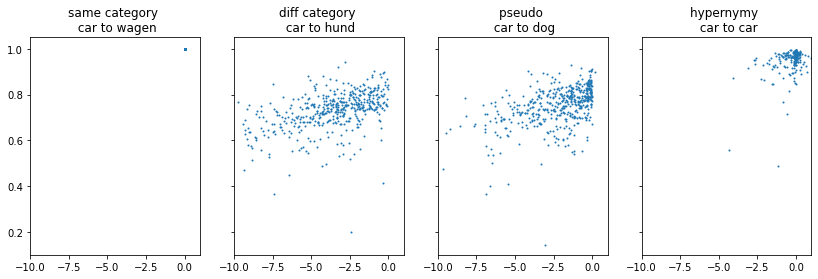

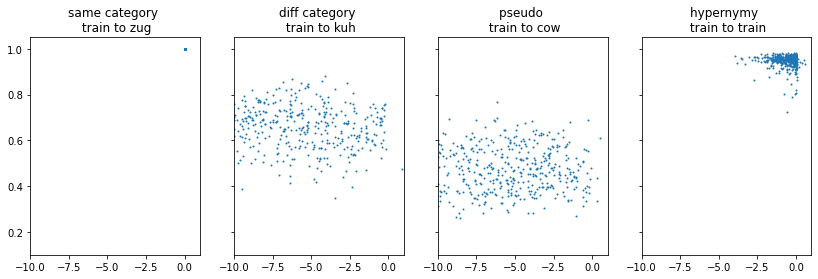

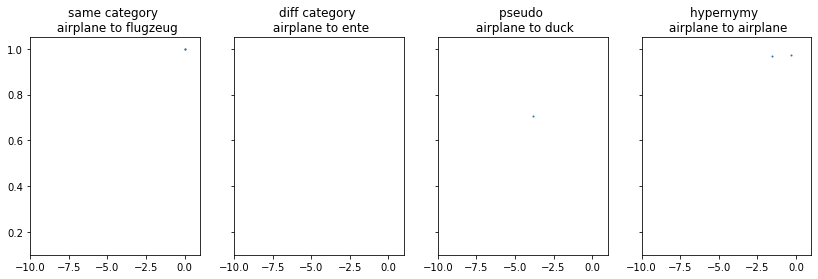

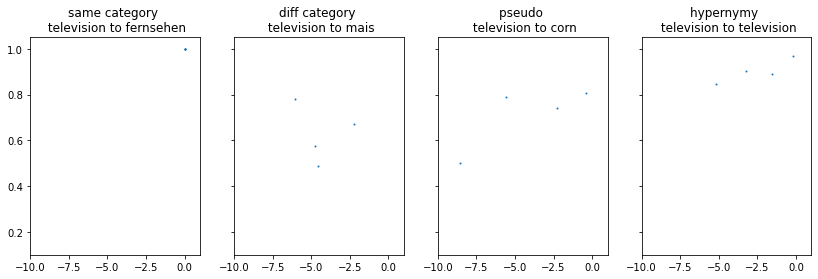

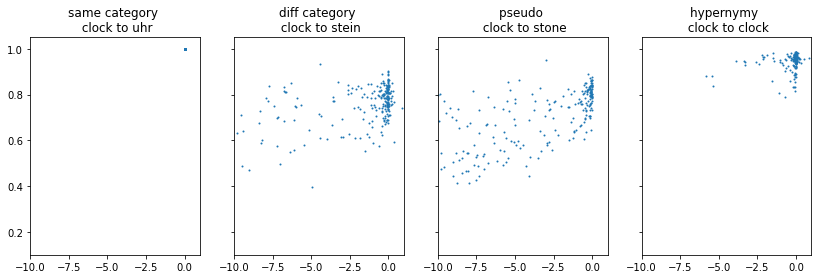

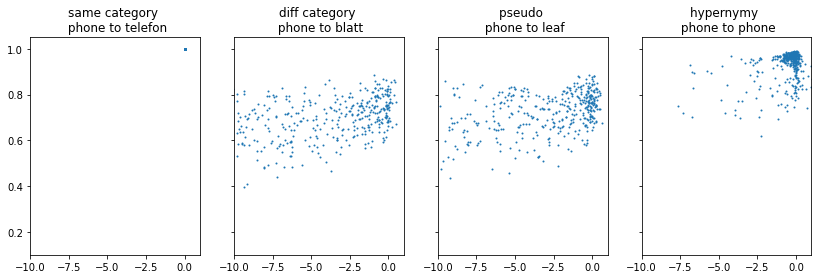

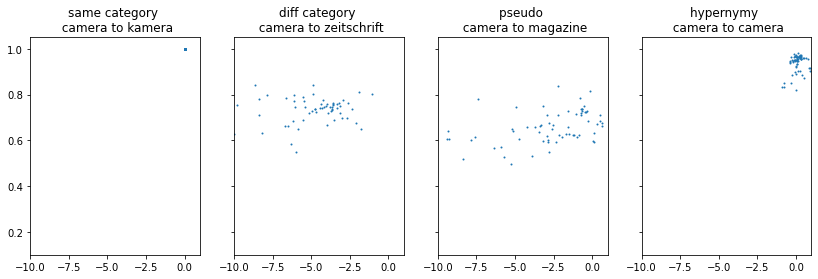

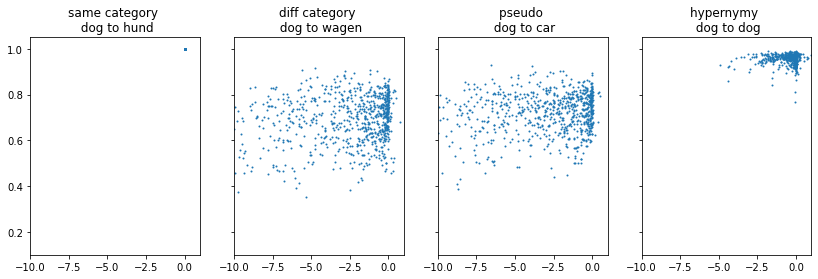

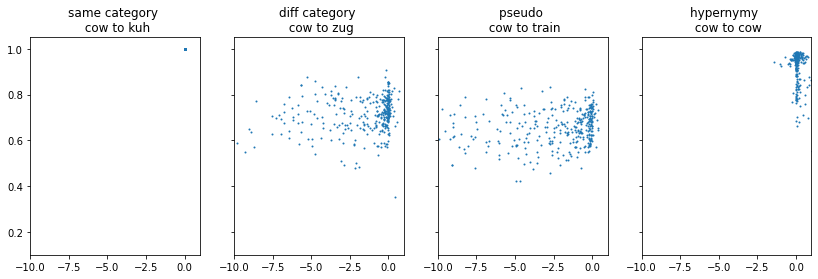

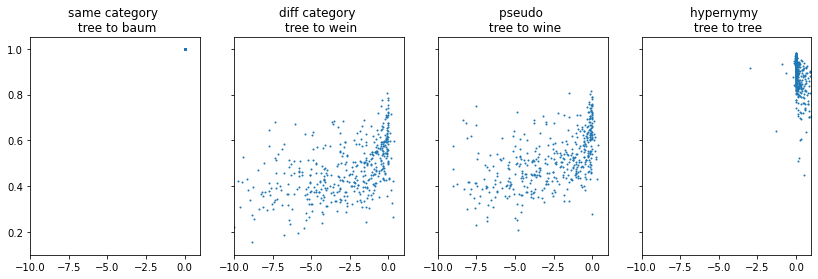

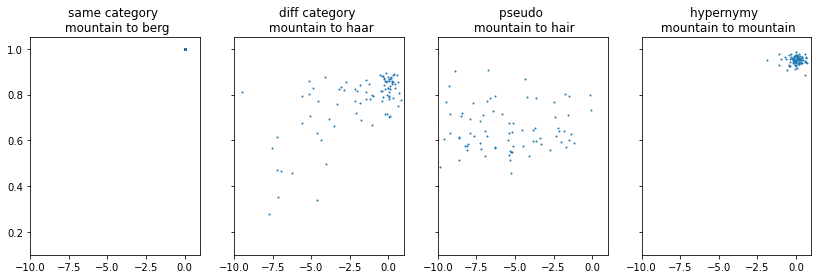

In [98]:
'''use original questions'''
def quesfunc(sent):
    return sent

from unidecode import unidecode
'''modified for multilingual VQA'''
symbolic_objects= [unidecode(s).lower() for s in tset.symbolic_vocab.objects]

for food_idid in range(0,Nscan):
    if object_file == "object_list_bilingual_train":
        from data.PWI.object_list_bilingual import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
    elif object_file == "object_list_bilingual_train_GETags":
        from data.PWI.object_list_bilingual_GETags import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list
    
    
    print(len(food_list),food_list)
    print(len(animal_list),animal_list)

    #food_idid=1
    food_list=[food_list[food_idid]]
    
    animal_list=[animal_list[food_idid]]
    food_list_cate=[food_list_cate[food_idid]]
    pseudo_list=[pseudo_list[food_idid]]
    hypernymy_list=[hypernymy_list[food_idid]]
    
    if object_file == "object_list_bilingual_train":
        use_list=food_list
    elif object_file == "object_list_bilingual_train_GETags":
        use_list=hypernymy_list 
        
    target_object=food_list[0]
    answer_item=use_list[0]
    data = []
    word_ref=target_object

    #dataset_name='nominival'
    dataset_name='train'

    description='embed_v2'

    dataset_tailor="{}_Anna_{}".format(dataset_name,description)

    data.extend(json.load(open("data/vqa/{}.json".format(dataset_name))))
    data_food=[]
    for i in range(len(data)):
        for item in data[i]['label'].keys():
            if item in use_list:
                data_food.append(data[i])
    print(len(data_food))
    import json
    with open("data/vqa/"+dataset_tailor+".json", 'w') as f:
        json.dump(data_food, f)
    print(dataset_tailor)

    '''start vqa test'''

    '''
    1) dataset_tailor is the dataset with food_list in answers
    2) keep shuffle=False for a consistent order between different model evaluations
    '''

    vqa.model.eval()
    print(dataset_tailor)
    eval_tuple = get_data_tuple(dataset_tailor,bs=64,shuffle=False, drop_last=False)

    '''
    1) tset.symbolic_vocab.objects
    with a length of 1600
    including all the objects from RNN
    2) dset.ans2label
    with a length of 3129
    including all the answers from VQA
    '''

    food_obj_id = [symbolic_objects.index(food_tmp) for food_tmp in food_list]
    food_ans_id = [dset.ans2label[food_tmp] for food_tmp in use_list]
    print(food_obj_id)
    print(food_ans_id)

    # animal_obj_id = [tset.symbolic_vocab.objects.index(animal_tmp) for animal_tmp in animal_list]
    # animal_ans_id = [dset.ans2label[animal_tmp] for animal_tmp in animal_list]
    # print(animal_obj_id)
    # print(animal_ans_id)
    '''no tags'''
    
    target_list = food_list
    use_category = food_obj_id
    replace_obj_id = food_list # not used but need to define

    quesid6 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=False,
                               feat_filter_en=True,
                               No_tags=True
                              )

    
    '''no replacement'''
    target_list = food_list
    use_category = food_obj_id
    replace_obj_id = food_list # not used but need to define

    quesid0 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=False,
                               feat_filter_en=True,
                               No_tags=False
                              )

    LM_choice = quesid0['LM_ans']
    print(len(LM_choice))
    LM_choice_id = [symbolic_objects.index(_tmp) if _tmp in use_list else 9999 for _tmp in LM_choice ]

    ans_intargetlist=[(i,sco,ans) for i,(sco,ans,multi_ans,N_obj) in enumerate(zip(quesid0['LM_ans_score'],
                                                                           quesid0['LM_ans'],
                                                                           quesid0['multi_ans'],
                                                                           quesid0['N_obj_pick']
                                                                                )) if ans in use_list and N_obj>0]
    target_select_id =[i[0] for i in ans_intargetlist]
    print(len(ans_intargetlist))
    print(len(target_select_id))

    score0=[]
    for i,score,ans in ans_intargetlist:
        score0.append(quesid0['logit'][i][dset.ans2label[ans]].item())

    dict_use=quesid0
    quesid_new={}
    quesid_new['image_feats_bert']=[]
    quesid_new['image_tags_bert']=[]
    quesid_new['image_obj']=[]
    for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                         dict_use['image_tags_bert'],
                                                         dict_use['image_obj'])):
        if i in target_select_id:
            #print(i,feats_bert.shape)
            #print(i,tags_bert.shape)
            #print(i,obj_id)
            quesid_new['image_feats_bert'].append(feats_bert)
            quesid_new['image_tags_bert'].append(tags_bert)
            quesid_new['image_obj'].append(obj_id)
    print(len(quesid_new['image_feats_bert']))
    

    hidden_0,_ = plot_cs_singleobj(quesid_new);

#     for offset_id in range(Nscan):

#         if object_file == "object_list_bilingual_train":
#             from data.PWI.object_list_bilingual import food_list,animal_list,food_list_cate,pseudo_list,hypernymy_list 

    #target_list = food_list
    #use_category = food_obj_id
    replace_obj_id = food_list_cate # not used but need to define
    quesid1 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=True,
                               feat_filter_en=True,
                               No_tags=False
                              )
    score_noreplace=[]
    for i,score,ans in ans_intargetlist:
        score_noreplace.append(quesid1['logit'][i][dset.ans2label[ans]].item())

    dict_use=quesid1
    quesid_new={}
    quesid_new['image_feats_bert']=[]
    quesid_new['image_tags_bert']=[]
    quesid_new['image_obj']=[]
    for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                         dict_use['image_tags_bert'],
                                                         dict_use['image_obj'])):
        if i in target_select_id:
            #print(i,feats_bert.shape)
            #print(i,tags_bert.shape)
            #print(i,obj_id)
            quesid_new['image_feats_bert'].append(feats_bert)
            quesid_new['image_tags_bert'].append(tags_bert)
            quesid_new['image_obj'].append(obj_id)
    #print(len(quesid_new['image_feats_bert']))

    hidden_1,_ = plot_cs_singleobj(quesid_new);


    replace_obj_id = animal_list # not used but need to define
    quesid2 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=True,
                               feat_filter_en=True,
                               No_tags=False
                              )
    score_wreplace=[]
    for i,score,ans in ans_intargetlist:
        score_wreplace.append(quesid2['logit'][i][dset.ans2label[ans]].item())
        
    dict_use=quesid2
    quesid_new={}
    quesid_new['image_feats_bert']=[]
    quesid_new['image_tags_bert']=[]
    quesid_new['image_obj']=[]
    for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                         dict_use['image_tags_bert'],
                                                         dict_use['image_obj'])):
        if i in target_select_id:
            #print(i,feats_bert.shape)
            #print(i,tags_bert.shape)
            #print(i,obj_id)
            quesid_new['image_feats_bert'].append(feats_bert)
            quesid_new['image_tags_bert'].append(tags_bert)
            quesid_new['image_obj'].append(obj_id)
    #print(len(quesid_new['image_feats_bert']))

    hidden_2,_ = plot_cs_singleobj(quesid_new);

    replace_obj_id = pseudo_list # not used but need to define

    quesid5 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=True,
                               feat_filter_en=True,
                               No_tags=False
                              )
    score_pseudo=[]
    for i,score,ans in ans_intargetlist:
        score_pseudo.append(quesid5['logit'][i][dset.ans2label[ans]].item())
    dict_use=quesid5
    quesid_new={}
    quesid_new['image_feats_bert']=[]
    quesid_new['image_tags_bert']=[]
    quesid_new['image_obj']=[]
    for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                         dict_use['image_tags_bert'],
                                                         dict_use['image_obj'])):
        if i in target_select_id:
            #print(i,feats_bert.shape)
            #print(i,tags_bert.shape)
            #print(i,obj_id)
            quesid_new['image_feats_bert'].append(feats_bert)
            quesid_new['image_tags_bert'].append(tags_bert)
            quesid_new['image_obj'].append(obj_id)
    #print(len(quesid_new['image_feats_bert']))


    hidden_3,_ = plot_cs_singleobj(quesid_new);

    #if offset_id == 0:
    replace_obj_id = hypernymy_list # not used but need to define
    quesid4 = PWI_FixedReplace_QuesModify_Embed(quesfunc,vqa,
                               eval_tuple,
                               tset,
                               tokenizer,
                               replace_obj_id,
                               use_category,
                               ans_filter = None,
                               replace_en=True,
                               feat_filter_en=True,
                               No_tags=False
                              ) 
    score_hyponymy=[]
    for i,score,ans in ans_intargetlist:
        score_hyponymy.append(quesid4['logit'][i][dset.ans2label[ans]].item())
    dict_use=quesid4
    quesid_new={}
    quesid_new['image_feats_bert']=[]
    quesid_new['image_tags_bert']=[]
    quesid_new['image_obj']=[]
    for i,(feats_bert,tags_bert,obj_id) in enumerate(zip(dict_use['image_feats_bert'],
                                                         dict_use['image_tags_bert'],
                                                         dict_use['image_obj'])):
        if i in target_select_id:
            #print(i,feats_bert.shape)
            #print(i,tags_bert.shape)
            #print(i,obj_id)
            quesid_new['image_feats_bert'].append(feats_bert)
            quesid_new['image_tags_bert'].append(tags_bert)
            quesid_new['image_obj'].append(obj_id)
    print(len(quesid_new['image_feats_bert']))

    hidden_4,_ = plot_cs_singleobj(quesid_new);

    cs_index = 0#food_list.index(answer_item)
    s_no=[]
    s_same=[]
    s_diff=[]
    s_pseudo=[]
    s_hyponymy=[]
    #s_notags=[]
    for i,score,ans in ans_intargetlist:
        if ans==answer_item:
            s_no.append(quesid0['logit'][i][dset.ans2label[ans]].item())
            s_same.append(quesid1['logit'][i][dset.ans2label[ans]].item())
            s_diff.append(quesid2['logit'][i][dset.ans2label[ans]].item())
            s_pseudo.append(quesid5['logit'][i][dset.ans2label[ans]].item())
            s_hyponymy.append(quesid4['logit'][i][dset.ans2label[ans]].item())
            #s_notags.append(quesid6['logit'][i][dset.ans2label[ans]].item())
    s_no=np.array(s_no)
    s_same=np.array(s_same)
    s_diff=np.array(s_diff)
    s_pseudo=np.array(s_pseudo)
    s_hyponymy=np.array(s_hyponymy)
    #s_notags=np.array(s_notags)
    p_no=-log2(s_no)
    p_sa=-log2(s_same)
    p_di=-log2(s_diff)
    p_ps=-log2(s_pseudo)
    p_hy=-log2(s_hyponymy)
    #p_notags=-log2(s_notags)

    f_sa=p_no-p_sa
    f_di=p_no-p_di
    f_ps=p_no-p_ps
    f_hy=p_no-p_hy
    #f_notags=p_no-p_notags
    ans_pos=0
    cs_same=[cos_sim(a,b) for a,b in zip(hidden_0[target_object],hidden_1[food_list_cate[ans_pos]])]
    cs_diff=[cos_sim(a,b) for a,b in zip(hidden_0[target_object],hidden_2[animal_list[ans_pos]])]
    cs_pseudo=[cos_sim(a,b) for a,b in zip(hidden_0[target_object],hidden_3[pseudo_list[ans_pos]])]
    cs_hypernymy=[cos_sim(a,b) for a,b in zip(hidden_0[target_object],hidden_4[hypernymy_list[ans_pos]])]
    #cs_notags=[cos_sim(a,b) for a,b in zip(hidden_0[answer_item],hidden_4[hypernymy_list[ans_pos]])]

    fig, ax = plt.subplots(1, 4,figsize=[14,4],sharey=True)
    #fig.suptitle('Horizontally stacked subplots')
    ax[0].scatter(f_sa,cs_same,s=1)
    ax[0].set_title('same category \n %s to %s'%(answer_item,food_list_cate[ans_pos]))
    ax[0].set_aspect('auto')
    ax[0].set_xlim([-10,1])
    ax[0].set_ylim([0.1,1.05])
    ax[1].scatter(f_di,cs_diff,s=1)
    ax[1].set_title('diff category \n %s to %s'%(answer_item,animal_list[ans_pos]))
    ax[1].set_aspect('auto')
    ax[1].set_xlim([-10,1])
    ax[2].scatter(f_ps,cs_pseudo,s=1)
    ax[2].set_title('pseudo \n %s to %s'%(answer_item,pseudo_list[ans_pos]))
    ax[2].set_aspect('auto')
    ax[2].set_xlim([-10,1])
    ax[3].scatter(f_hy,cs_hypernymy,s=1)
    ax[3].set_title('hypernymy \n %s to %s'%(answer_item,hypernymy_list[ans_pos]))
    ax[3].set_aspect('auto')
    ax[3].set_xlim([-10,1])
#         ax[0].scatter(f_no,cs_notags,s=1)
#         ax[4].set_title('hypernymy \n %s to none'%(answer_item))
#         ax[4].set_aspect('auto')
#         ax[4].set_xlim([-10,1])
    savefig('./save/figures/%s_%s_epoch%d_multilingual_GE.jpg'%(dataset_name,target_object,epoch))
    filename0='./save/embed/%s_%s_epoch%d_multilingual_GE.npz'%(dataset_name,target_object,epoch)
    savez(filename0,
         quesid0=quesid0,
         quesid1=quesid1,
         quesid2=quesid2,
         quesid5=quesid5,
         quesid4=quesid4,
          quesid6=quesid6,
          target_object=target_object,
          #offset_id=offset_id,
          object_file=object_file,
          ans_intargetlist=ans_intargetlist
        )